In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy.fft import fft2, ifft2, fftfreq, fftshift, ifftshift

In [2]:
ρa = 5                          # Radio de la abertura adimensional r_a/λ
lim = 20
N = 1001
x = np.linspace(-lim, lim, N)   # Distancia radial adimensional x/λ
Δx = x[1]-x[0]
y = np.linspace(-lim, lim, N)   # Distancia radial adimensional y/λ
Δy = y[1]-y[0]
ζ = np.linspace(0, 3, 100)      # Distancia de propagación adimensional z/r_a
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
U0 = 1-(R<ρa)                   # Campo debido al disco opaco

In [3]:
fftU = fft2(U0)
fx = fftfreq(N, Δx)
fy = fftfreq(N, Δy)
Fx, Fy = np.meshgrid(fx, fy)
Ρ = np.sqrt(Fx**2+Fy**2)
Hf = []
for z in ζ:
    Hf.append(np.exp(-1j*np.pi*ρa*z*Ρ**2))   # Función de transferencia
U = []
for i in range(len(ζ)):
    U.append(ifft2(fftU*Hf[i]))
U = np.array(U)
I = abs(np.transpose(U[:,(N-1)//2,:]))**2    # Intensidad en el plano XZ

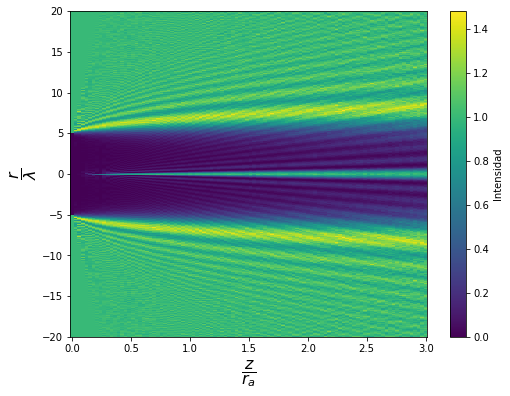

In [4]:
fig, ax0 = plt.subplots(figsize=(8,6))
im = ax0.pcolormesh(ζ, x, I, shading='auto')
fig.colorbar(im, ax=ax0, label='Intensidad')
plt.xlabel(r'$\dfrac{z}{r_{a}}$', fontsize=16)
plt.ylabel(r'$\dfrac{r}{\lambda}$', fontsize=16)
plt.show()